In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/xiangyusi/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


### The basic tensorflow structure: y = W * x + b

In [2]:
# usually float32 in tensorflow
x_data = np.random.rand(100).astype(np.float32)
y_data = 0.1 * x_data + 0.3

'''-------------create tensorflow structure start-------------'''
# initial value for weights and bias
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))    # random number 1D for variable [-1.0, 1.0]
bias = tf.Variable(tf.zeros([1]))   # bias = 0
y = W * x_data + bias

loss = tf.reduce_mean(tf.square(y - y_data))

# use optimizer to reduce loss, learning rate = 0.5
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# before this code, in tensorflow they are not initialized
init = tf.global_variables_initializer()
'''-------------create tensorflow structure end-------------'''

# activate the tensorflow
sess = tf.Session()
sess.run(init)
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(bias))

(0, array([-0.2732656], dtype=float32), array([0.6707308], dtype=float32))
(20, array([0.00091065], dtype=float32), array([0.3516342], dtype=float32))
(40, array([0.07795953], dtype=float32), array([0.31148502], dtype=float32))
(60, array([0.09509754], dtype=float32), array([0.3025546], dtype=float32))
(80, array([0.09890956], dtype=float32), array([0.30056822], dtype=float32))
(100, array([0.09975746], dtype=float32), array([0.3001264], dtype=float32))
(120, array([0.09994606], dtype=float32), array([0.30002812], dtype=float32))
(140, array([0.09998801], dtype=float32), array([0.30000627], dtype=float32))
(160, array([0.09999734], dtype=float32), array([0.3000014], dtype=float32))
(180, array([0.09999942], dtype=float32), array([0.3000003], dtype=float32))
(200, array([0.09999988], dtype=float32), array([0.30000007], dtype=float32))


### Tensorflow multiplication

In [3]:
# Be careful with how to write the 2D matrix
matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2],[2]])

# Matrix multiply
product = tf.matmul(matrix1, matrix2)   # matrix multiply np.dot(m1, m2)

# method 1
sess = tf.Session()
result1 = sess.run(product)
print(result1)
sess.close()

# method 2 automatically close when reaching the end
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]
[[12]]


In [4]:
# Initialize 2 constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# But if we use print(result) the result doesn't actually get calculated, it just defined the model but no process ran to calculate the result.

# Initialize the Session
sess = tf.Session()

# method 1
print(sess.run(result))
# [ 5 12 21 32]

# Close the session
sess.close()

# method 2
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

[ 5 12 21 32]
[ 5 12 21 32]


### Tensorflow Variable

In [5]:
state = tf.Variable(0, name='counter')
print(state.name)   # counter:0

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# must have if we define tf.Variable
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

counter:0
1
2
3


### Tensorflow placeholder

why using placeholder? pass value into the run step ~ feed_dict

In [6]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.], input2: [2.]}))

[14.]


### Tensorflow Activation Function

relu, sigmoid, tanh <br>
if there's few hidden layers, can try any activation function <br>
if it is Convolutional Neural Network, recommend relu <br>
if it is Recurrent Neural Network, recommend relu or tanh <br>
activate part of the neurons to next neural layer <br>
dropout reduce the effect of overfitting <br>

### Define add_layer()

In [7]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    W = tf.Variable(tf.random_normal([in_size, out_size]))  # in_size * out_size
    bias = tf.Variable(tf.zeros([1, out_size]) + 0.1)   # recommend a very small value to initialize the bias
    Wx_plus_b = tf.matmul(inputs, W) + bias     # input [1, in_size]
   
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

### Visualize the result

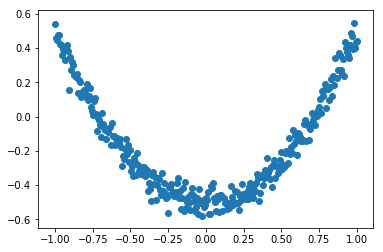

In [8]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis] # 300 data ranging from -1 to 1, 300 * 1
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.show()

In [9]:
xs = tf.placeholder(tf.float32, [None, 1])  # None means any number of input, 1 means 1 feature
ys = tf.placeholder(tf.float32, [None, 1])

# 1 feature x_data: 1 unit
# hidden layer: we assume 10 units
# output: 1 unit

# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# when running using placeholder, it is necessary to assign input with feed_dict
for step in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if step % 50 == 0:
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.589473
0.017492982
0.00898453
0.007277913
0.006273481
0.005513851
0.0049863416
0.004631693
0.004373278
0.0041828332
0.004056171
0.003942031
0.0038280694
0.0037531813
0.0036957248
0.0036453418
0.003604745
0.0035607005
0.003514737
0.0034742102


#### Continuous visualization

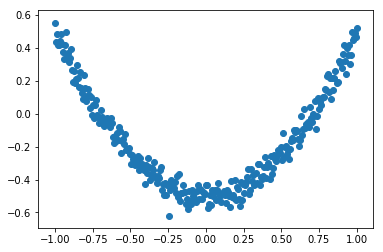

In [10]:
x_data = np.linspace(-1, 1, 300)[:, np.newaxis] # 300 data ranging from -1 to 1, 300 * 1
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])  # None means any number of input, 1 means 1 feature
ys = tf.placeholder(tf.float32, [None, 1])

# 1 feature x_data: 1 unit
# hidden layer: we assume 10 units
# output: 1 unit

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# generate a figure
fig = plt.figure()
# continuous
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

# when running using placeholder, it is necessary to assign input with feed_dict
for step in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if step % 50 == 0:
        # plot first or remove first?
        try:
            ax.lines.remove(lines[0])      # because the first time there is no line, we use try except
        except Exception:
            pass
        # print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        prediction_value = sess.run(prediction, feed_dict={xs: x_data}) # prediction is related to x
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)   # red line and width = 5
        # ax.lines.remove(lines[0])   # remove the previous line so we can see the
        plt.pause(0.1)

### Speed up training

Usually: W += -Learning rate * dx (校正值)

Stochastic Gradient Descent: split into many parts and train these parts. Although cannot reflect the whole dataset, but it can speed up training and will not lose much accuracy. <br>
SGD <br>
Momentun: <br>
===> m = b1 * m - Learning rate * dx <br>
===> W += m <br>
NAG <br>
AdaGrad: <br>
===> has its own learning rate for each parameter <br>
===> v += dx^2 <br>
===> W += -Learning rate * dx / sqrt(v) <br>
Adadelta <br>
Rmsprop: <br>
Momentum (m = b1 * m - Learning rate * dx) + AdaGrad (v += dx^2) <br>
===> v = b1 * v + (1 - b1) * dx^2 <br>
===> W += -Learning rate * dx / sqrt(v) <br>
Adam (usually best!!!): <br>
===> m = b1 * m - (1 - b1) * dx  ------> Momentum <br>
===> v = b2 * v + (1 - b1) * dx^2 -----> AdaGrad <br>
===> W += -Learning rate * dx / sqrt(v) <br>

### Optimizer

GradientDescentOptimizer <br>
AdadeltaOptimizer <br>
AdagradOptimizer <br>
MomentumOptimizer <br>
AdamOptimizer <br>
FtrlOptimizer <br>
RMSPropOptimizer <br>

### tensorboard 1

In [11]:
# add one more layer and return the output of this layer
def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            W = tf.Variable(tf.random_normal([in_size, out_size]), name = 'W')  # in_size * out_size
        with tf.name_scope('biases'):
            bias = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')   # recommend a very small value to initialize the bias
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, W), bias)     # input [1, in_size]
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')  # None means any number of input, 1 means 1 feature
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


sess = tf.Session()
# write to a tf file then we can read from file, graph collects information of previous frame and put under logs/
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(tf.global_variables_initializer())

#### in terminal: cd to the file which has logs/ and use " tensorboard --logdir='logs/' "

### tensorboard 2

In [12]:
# make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis] # 300 data ranging from -1 to 1, 300 * 1
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# add one more layer and return the output of this layer
def add_layer(inputs, in_size, out_size, n_layer, activation_function=None):
    layer_name = 'layer%s' % n_layer
    with tf.name_scope('layer_name'):
        with tf.name_scope('weights'):
            W = tf.Variable(tf.random_normal([in_size, out_size]), name = 'W')  # in_size * out_size
            tf.summary.histogram(layer_name + '/weights', W)
        with tf.name_scope('biases'):
            bias = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')   # recommend a very small value to initialize the bias
            tf.summary.histogram(layer_name + '/biases', bias)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, W), bias)     # input [1, in_size]
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
            tf.summary.histogram(layer_name + '/outputs', outputs)
        return outputs

# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')  # None means any number of input, 1 means 1 feature
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# add hidden layer
l1 = add_layer(xs, 1, 10, n_layer=1, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, n_layer=2, activation_function=None)

# the error between prediction and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))
    tf.summary.scalar('loss', loss) # shown in EVENTS. If loss is decreasing, it learns.
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


sess = tf.Session()
merged = tf.summary.merge_all()
# write to a tf file then we can read from file, graph collects information of previous frame and put under logs/
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(tf.global_variables_initializer())

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50 == 0:
        result = sess.run(merged, feed_dict={xs:x_data, ys:y_data})
        # put the result into writer
        writer.add_summary(result, i)

#### in terminal: cd to the file which has logs/ and use " tensorboard --logdir='logs/' "

### Classification

每个数字会转化成vector of 28 * 28 = 784 numbers作为x_input <br>
1 ---> y = [0, 1, 0, 0, ...] <br>
2 ---> y = [0, 0, 1, 0, ...] <br>
... <br>


In [13]:
# Import 'tensorflow'
import tensorflow as tf
# 55000 training pictures, which are 28 * 28 = 728 pixels
from tensorflow.examples.tutorials.mnist import input_data

# it will be downloaded from internet
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# add one more layer and return the output of this layer
def add_layer(inputs, in_size, out_size, activation_function=None):
        W = tf.Variable(tf.random_normal([in_size, out_size]), name = 'W')  # in_size * out_size
        bias = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')   # recommend a very small value to initialize the bias
        Wx_plus_b = tf.add(tf.matmul(inputs, W), bias)     # input [1, in_size]
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

def compute_accuracy(v_xs, v_ys) :
    global prediction
    y_pred = sess.run(prediction, feed_dict={xs: v_xs})
    # compare the difference between y_pred (prediction) and v_ys (real data)
    # argmax: Returns the index with the largest value across axes of a tensor
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(v_ys, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
# [None, 784] not define the size of sample
xs = tf.placeholder(tf.float32, [None, 784])  # None means any number of input, 1 means 1 feature
# for each sample, there are 10 outputs
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer, softmax && cross_entropy are usually used for classification
prediction = add_layer(xs, 784, 10, activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    # stochastic gradient descent: train 100 dataset every time and it would be fast
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs:batch_xs, ys:batch_ys})
    if i % 50 == 0:
        # differentiate the training data and test data (if we mix them together, there could be more error)
        print(compute_accuracy(mnist.test.images, mnist.test.labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.1373
0.6606
0.752
0.7942
0.8082
0.8267
0.8379
0.841
0.8477
0.8487
0.8548
0.8609
0.86
0.8677
0.8687
0.8706
0.8728
0.8713
0.8756
0.8742


### Overfitting

solution1: increase dataset <br>
solution2: regularization similar among many ML methods<br>
y = W * x <br>
cost = (W * x - real y)^2 <br>
W变化太大的话，cost也应该变化更大，所以把W考虑进来：<br>
===> L1: cost = (W * x - real y)^2 + abs(W) <br>
===> L2: cost = (W * x - real y)^2 + (W)^2 <br>
Used for neural network: dropout regularization <br>
每次训练时随机忽略掉神经元和神经连接，用不完整的神经网络训练一次，下一次训练时再随机忽略掉... <br>
这样训练出来的结果就不会过于依赖某一部分的神经元 <br>

In [14]:
# Import 'tensorflow'
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

# load data
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)   # e.g. y = [0, 1, 0, 0, ...] stands for 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# add one more layer and return the output of this layer
def add_layer(inputs, in_size, out_size, layer_name, activation_function=None, ):
        W = tf.Variable(tf.random_normal([in_size, out_size]))  # in_size * out_size
        bias = tf.Variable(tf.zeros([1, out_size]) + 0.1, )   # recommend a very small value to initialize the bias
        Wx_plus_b = tf.matmul(inputs, W) + bias    # input [1, in_size]
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        tf.summary.histogram(layer_name + 'outputs', outputs)
        return outputs

keep_prob = tf.placeholder(tf.float32)
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 64])  # 8 * 8 = 64 for sklearn
# for each sample, there are 10 outputs
ys = tf.placeholder(tf.float32, [None, 10]) # 0 - 9

# add output layer, softmax && cross_entropy are usually used for classification
# output 100 in order to see the overfitting
# using tanh() to avoid to change input into null
l1 = add_layer(xs, 64, 100, 'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 100, 10, 'l2', activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))
tf.summary.scalar('loss', cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.6).minimize(cross_entropy)

sess = tf.Session()
merged = tf.summary.merge_all()
# summary writer goes in here
train_writer = tf.summary.FileWriter("logs/train", sess.graph)
test_writer = tf.summary.FileWriter("logs/test", sess.graph)

sess.run(tf.global_variables_initializer())

for i in range(500):
    sess.run(train_step, feed_dict={xs:X_train, ys:y_train})
    if i % 50 == 0:
        # record loss
        train_result = sess.run(merged, feed_dict={xs: X_train, ys: y_train, keep_prob: 1})
        test_result = sess.run(merged, feed_dict={xs: X_test, ys: y_test, keep_prob: 1})
        # put into summary writer
        train_writer.add_summary(train_result, i)   # the ith training
        test_writer.add_summary(test_result, i)

ImportError: No module named sklearn.datasets

test loss > train loss ==> overfitting

#### Using dropout to solve overfitting

In [ ]:
# Import 'tensorflow'
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

# load data
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)   # e.g. y = [0, 1, 0, 0, ...] stands for 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# add one more layer and return the output of this layer
def add_layer(inputs, in_size, out_size, layer_name, activation_function=None, ):
        W = tf.Variable(tf.random_normal([in_size, out_size]))  # in_size * out_size
        bias = tf.Variable(tf.zeros([1, out_size]) + 0.1, )   # recommend a very small value to initialize the bias
        Wx_plus_b = tf.matmul(inputs, W) + bias     # input [1, in_size]
        Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        tf.summary.histogram(layer_name + 'outputs', outputs)
        return outputs

keep_prob = tf.placeholder(tf.float32)
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 64])  # 8 * 8 = 64 for sklearn
# for each sample, there are 10 outputs
ys = tf.placeholder(tf.float32, [None, 10]) # 0 - 9

# add output layer, softmax && cross_entropy are usually used for classification
# output 100 in order to see the overfitting
# using tanh() to avoid to change input into null
l1 = add_layer(xs, 64, 50, 'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))
tf.summary.scalar('loss', cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.6).minimize(cross_entropy)

sess = tf.Session()
merged = tf.summary.merge_all()
# summary writer goes in here
train_writer = tf.summary.FileWriter("logs/train", sess.graph)
test_writer = tf.summary.FileWriter("logs/test", sess.graph)

sess.run(tf.global_variables_initializer())

for i in range(500):
    # from 1 to 0.5 and we can solve overfitting
    sess.run(train_step, feed_dict={xs:X_train, ys:y_train, keep_prob: 0.5})    # keep 50% not being dropped
    if i % 50 == 0:
        # record loss
        train_result = sess.run(merged, feed_dict={xs: X_train, ys: y_train, keep_prob: 1})
        test_result = sess.run(merged, feed_dict={xs: X_test, ys: y_test, keep_prob: 1})
        # put into summary writer
        train_writer.add_summary(train_result, i)   # the ith training
        test_writer.add_summary(test_result, i)

The loss difference between train and test becomes smaller.

## Convolutional Neural Network

卷积神经网络：卷积也就是说神经网络不再是对每个像素的输入信息做处理了,而是图片上每一小块像素区域进行处理, 这种做法加强了图片信息的连续性. 使得神经网络能看到图形, 而非一个点. 这种做法同时也加深了神经网络对图片的理解. 具体来说, 卷积神经网络有一个批量过滤器, 持续不断的在图片上滚动收集图片里的信息,每一次收集的时候都只是收集一小块像素区域, 然后把收集来的信息进行整理, 这时候整理出来的信息有了一些实际上的呈现, 比如这时的神经网络能看到一些边缘的图片信息, 然后在以同样的步骤, 用类似的批量过滤器扫过产生的这些边缘信息, 神经网络从这些边缘信息里面总结出更高层的信息结构, 比如说总结的边缘能够画出眼睛, 鼻子等等. 再经过一次过滤, 脸部的信息也从这些眼睛鼻子的信息中被总结出来. 最后我们再把这些信息套入几层普通的全连接神经层进行分类, 这样就能得到输入的图片能被分为哪一类的结果了. <br>
<br>
图片有长, 宽, 高 三个参数. 这里的高指的是计算机用于产生颜色使用的信息. 如果是黑白照片的话, 高的单位就只有1, 如果是彩色照片, 就可能有红绿蓝三种颜色的信息, 这时的高度为3. 以彩色照片为例子. 过滤器就是影像中不断移动的东西, 他不断在图片收集小批小批的像素块, 收集完所有信息后, 输出的值, 可以理解成是一个高度更高,长和宽更小的”图片”. 这个图片里就能包含一些边缘信息. 然后以同样的步骤再进行多次卷积, 将图片的长宽再压缩, 高度再增加, 就有了对输入图片更深的理解. 将压缩, 增高的信息嵌套在普通的分类神经层上, 就能对这种图片进行分类了. <br>
<br>
stride: 跨度 跨多少步抽取信息 <br>
--valid padding: 长宽减少 / 边界不填充, 结果会小一圈 / 卷积核在扫描和提取的过程中, 只是在原来的图片矩阵里面进行滑动<br>
--same padding：长宽和之前图片相同 / 填充一圈, 这样卷积结果大小不变 / 因为矩阵大小和滑动距离和卷积核大小的比例问题, 所以在原矩阵的周围补了一层0, 这样可以保证卷积核滑动到每一个位置 <br>
--pooling: <br>
   stride = 2 可能会损失部分信息 ===> stride = 1 + pooling <br>
   --max pooling <br>
   --average pooling <br>
image ==> (convolution + max pooling) ==> (convolution + max pooling) ==> fully connected ==> fully connected ==> classifier <br>

accuracy = 87%对于现在的技术来说比较低 ===> CNN

In [15]:
# Import 'tensorflow'
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys) :
    global prediction
    y_pred = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(v_ys, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)  # google uses truncated_normal!
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape) # usually a small positive number
    return tf.Variable(initial)

# x: input, W: weights
def conv2d(x, W):
    # size of vector strides is 4
    # strides [1, x_movement, y_movement, 1]
    # must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

def max_pool_2x2(x):
    # ksize: kernel size
    # during pooling: it would reduce the length and width
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])  # 8 * 8 = 784 for sklearn
ys = tf.placeholder(tf.float32, [None, 10]) # 0 - 9
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1,28,28,1])
# print(x_image.shape)    # [n_samples, 28, 28, 1]

## conv1 layer ##
W_conv1 = weight_variable([5,5,1,32])   # patch 5 * 5, in size 1 (black/white pic so input is 1), out size 32 (featuremap <height>)
bias_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + bias_conv1)   # similar to W * x + bias, tf.nn.relu makes it non-linear
# h_conv1 output size 28 * 28 * 32 (padding = 'SAME)
h_pool1 = max_pool_2x2(h_conv1)
# h_pool1 output size 14 * 14 * 32

## conv2 layer ##
W_conv2 = weight_variable([5,5,32,64])   # patch 5 * 5, in size 1 (black/white pic so input is 1), out size 32 (featuremap <height>)
bias_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + bias_conv2)   # similar to W * x + bias, tf.nn.relu makes it non-linear
# h_conv1 output size 14 * 14 * 32 (padding = 'SAME)
h_pool2 = max_pool_2x2(h_conv2)
# h_pool1 output size 7 * 7 * 32

## func1 layer ##
W_fct1 = weight_variable([7*7*64, 1024])
bias_fct1 = bias_variable([1024])
# [n_samples, 7, 7, 64] --> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fct1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fct1) + bias_fct1)
# if there's problem of overfitting, we can use dropout
h_fct1_drop = tf.nn.dropout(h_fct1, keep_prob)

## func2 layer ##
W_fct2 = weight_variable([1024, 10])
bias_fct2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fct1_drop, W_fct2) + bias_fct2)
# if there's problem of overfitting, we can use dropout
# prediction_drop = tf.nn.dropout(prediction, keep_prob)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), reduction_indices=[1]))
# for large dataset, it is better to use AdamOptimizer with smaller learning rate
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs:batch_xs, ys:batch_ys, keep_prob: 0.5})    # keep 0.5 not being dropped
    if i % 50 == 0:
        print(compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000]))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.087
0.759
0.865
0.895
0.91
0.923
0.935
0.943
0.946
0.951
0.955
0.953
0.961
0.958
0.959
0.967
0.966
0.965
0.968
0.969


strides = [1,x,x,1], strides[0] = strides[3] = 1 (usually) <br>
padding时选是一次一步, 也就是strides[1]=strides[2]=1, 这样得到的图片尺寸没有变化.
而我们希望压缩一下图片也就是参数能少一些从而减小系统的复杂度, 因此采用pooling来稀疏化参数, 也就是卷积神经网络中所谓的下采样层. <br>
pooling 有两种, 一种是最大值池化, 一种是平均值池化, 本例采用的是最大值池化tf.max_pool(). 池化的核函数大小为2x2, 因此ksize=[1,2,2,1]，步长为2, strides=[1,2,2,1]. <br>
(stride = 2 可能会损失部分信息 ===> stride = 1 + pooling)

### Saver

In [16]:
# Save to file
# define the same dtype and shape when restore
W = tf.Variable([[1,2,3], [4,5,6]], dtype=tf.float32, name='Weights')
bias = tf.Variable([[1,2,3]], dtype=tf.float32, name='biases')

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    save_path = saver.save(sess, "my_net/save_net.ckpt")
    print("Save to path: ", save_path)

('Save to path: ', 'my_net/save_net.ckpt')


In [22]:
import numpy as np

# Restore variables
# redefine the same dtype and same shape for variables
W = tf.Variable(np.arange(6).reshape((2, 3)), dtype=tf.float32, name="Weights")
b = tf.Variable(np.arange(3).reshape((1, 3)), dtype=tf.float32, name="biases")

# no init step

saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "my_net/save_net.ckpt")
    print("Weights: ", sess.run(W))
    print("biases: ", sess.run(b))

INFO:tensorflow:Restoring parameters from my_net/save_net.ckpt


NotFoundError: Key weights not found in checkpoint
	 [[Node: save_6/RestoreV2_60 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_6/Const_0_0, save_6/RestoreV2_60/tensor_names, save_6/RestoreV2_60/shape_and_slices)]]

Caused by op u'save_6/RestoreV2_60', defined at:
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-9a2c05861e4b>", line 10, in <module>
    saver = tf.train.Saver()
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/xiangyusi/Library/Python/2.7/lib/python/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key weights not found in checkpoint
	 [[Node: save_6/RestoreV2_60 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_6/Const_0_0, save_6/RestoreV2_60/tensor_names, save_6/RestoreV2_60/shape_and_slices)]]


## Recurrent Neural Network

循环神经网络：<br>
预测中的顺序排列很重要

In [23]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# classify the pictures into 0 - 9 classes

# set random seed for comparing the 2 result calculations
tf.set_random_seed(1)

# data used, for each data: 28 * 28 * 1 (black/white)
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# hyperparameters
lr = 0.001                  # learning rate
training_iters = 100000     # train step upper bound
batch_size = 128
n_inputs = 28               # MNIST data input (img shape: 28 * 28)
n_steps = 28                # time steps
n_hidden_units = 128        # neurons in hidden layer
n_classes = 10              # MNIST classes (0 - 9 digits)

# define placeholder for inputs to network
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

# define weights and biases
W = {
    # shape (28, 128)
    'in': tf.Variable(tf.random_normal([n_inputs, n_hidden_units])),
    # shape (128, 10)
    'out': tf.Variable(tf.random_normal([n_hidden_units, n_classes]))
}

bias = {
    # shape (128, )
    'in': tf.Variable(tf.constant(0.1, shape=[n_hidden_units, ])),
    # shape (10, )
    'out': tf.Variable(tf.constant(0.1, shape=[n_classes, ]))
}

def RNN(x, W, bias):
    # hidden layer for input to cell
    ###################################################################
    # original x is a 3D dataset, need to make it into 2D then we can use matrix multiplication
    # x(128 batch, 28 steps, 28 inputs) ==> (128 * 28, 28 inputs) n)
    x = tf.reshape(x, [-1, n_inputs])
    # ==> (128 batch * 28 steps, 128 hidden)
    x_in = tf.matmul(x, W['in']) + bias['in']
    # ==> (128 batch, 28 steps, 128 hidden) make it into 3D
    x_in = tf.reshape(x_in, [-1, n_steps, n_hidden_units])

    # cell
    ###################################################################
    # forget_bias=1.0, when initializing, don't forget previous memory
    # state_is_tuple=True
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden_units, forget_bias=1.0, state_is_tuple=True)
    # lstm cell is divided into 2 parts (c_state<primary>, m_state<secondary>)
    _init_state = lstm_cell.zero_state(batch_size, dtype=tf.float32)
    # for BasicRNNCell, states = m_state
    # for BasicLSTMCell, states = c_state, m_state
    # tf.nn.dynamic_rnn is better
    # time_major
    outputs, states = tf.nn.dynamic_rnn(lstm_cell, x_in, initial_state=_init_state, time_major=False)

    # hidden layer for output as the final results
    ###################################################################
    # states[1] is m_state
    # results = tf.matmul(states[1], W['out']) + bias['out']
    # or unpack to list [(batch, outputs)..]
    outputs = tf.unstack(tf.transpose(outputs, [1,0,2]))
    results = tf.matmul(outputs[-1], W['out'] + bias['out'])
    return results

prediction = RNN(x, W, bias)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
train_op = tf.train.AdamOptimizer(lr).minimize(cost)

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 0
    while step * batch_size < training_iters:   # step * 128 < 100000
        batch_xs, batch_ys = mnist.train.next_batch(batch_size) # get the next batch from MNIST
        batch_xs = batch_xs.reshape([batch_size, n_steps, n_inputs])
        sess.run([train_op], feed_dict={x:batch_xs, y:batch_ys})
        if step % 20 == 0:
            print(sess.run(accuracy, feed_dict={x:batch_xs, y:batch_ys}))
        step += 1

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.1796875
0.6484375
0.7578125
0.84375
0.8125
0.84375
0.8515625
0.90625
0.84375
0.90625
0.859375


KeyboardInterrupt: 

这里是用的train的数据计算的accuracy，如果需要更准确，需要使用test的数据

### RNN LSTM (regression)

蓝色虚线预测红色实线

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/Users/xiangyusi/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


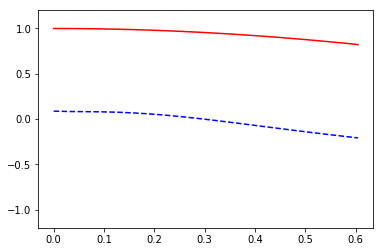

('cost: ', 10.6637)


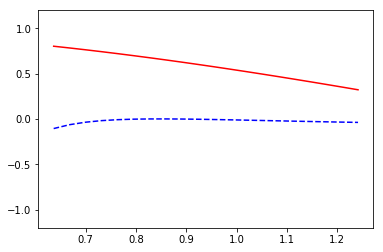

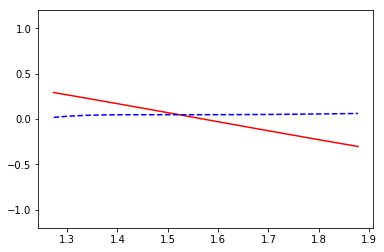

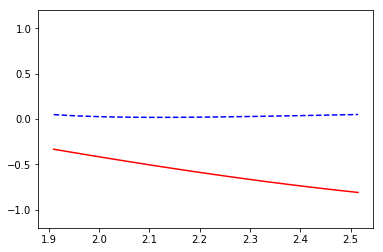

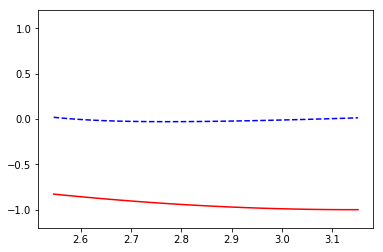

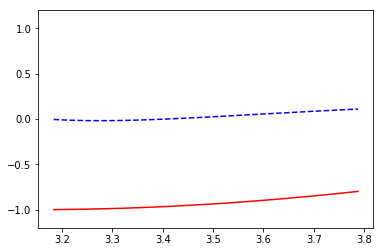

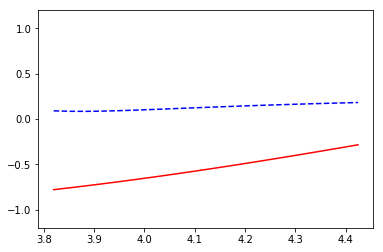

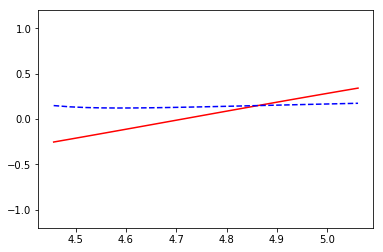

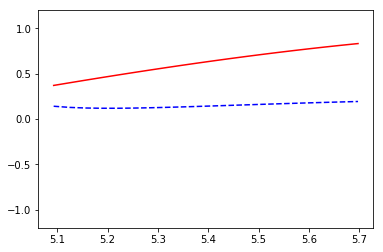

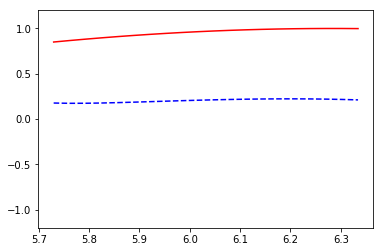

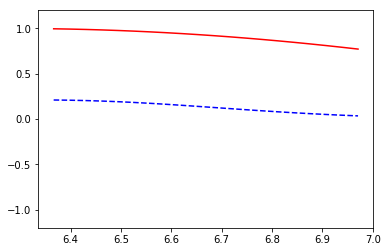

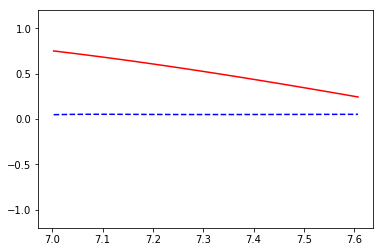

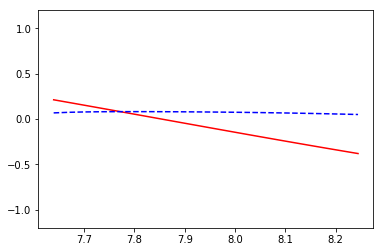

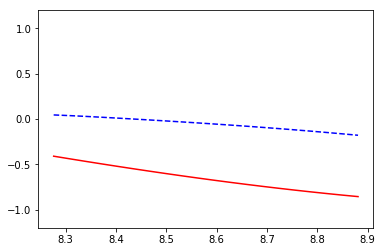

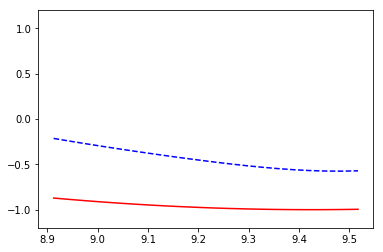

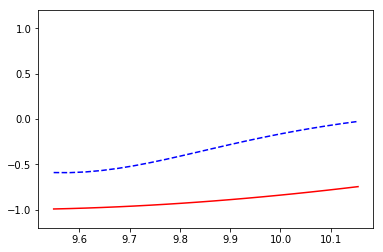

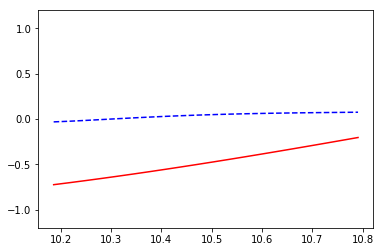

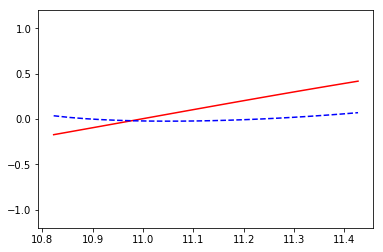

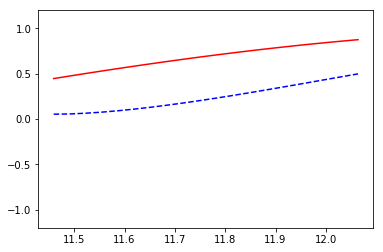

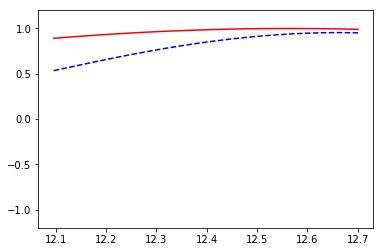

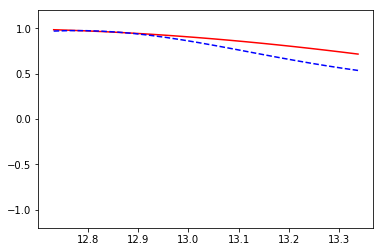

('cost: ', 1.5395)


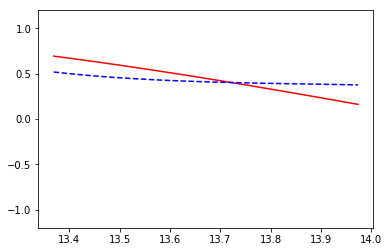

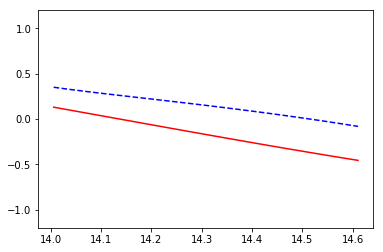

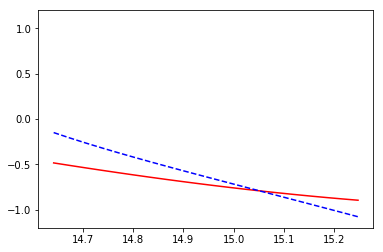

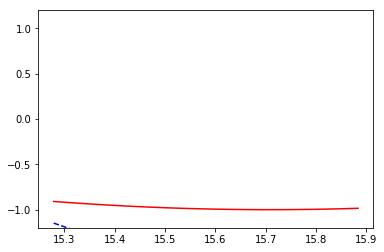

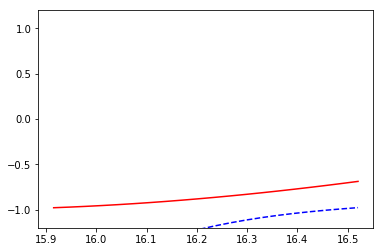

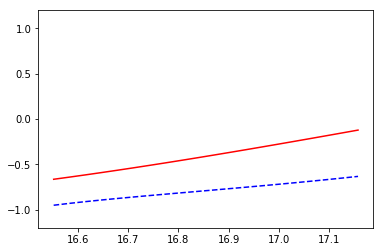

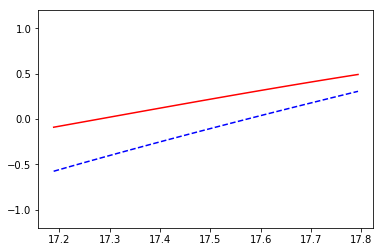

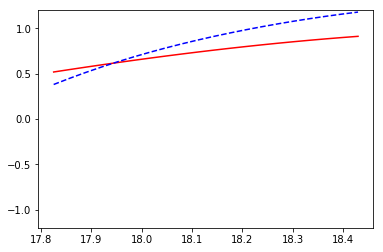

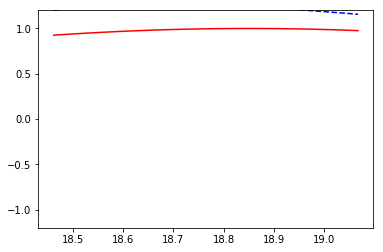

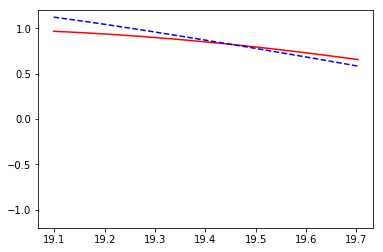

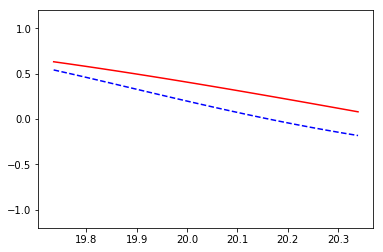

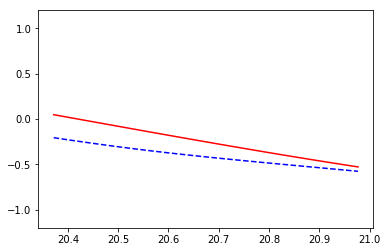

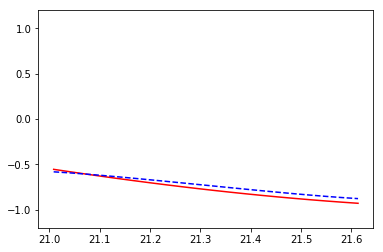

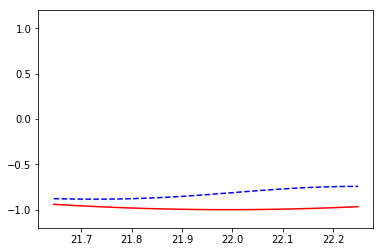

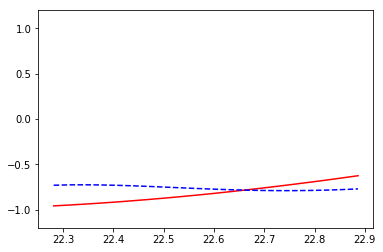

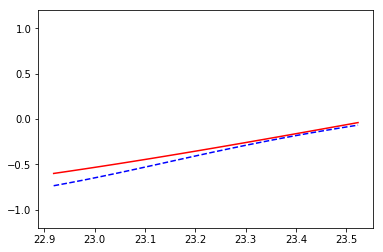

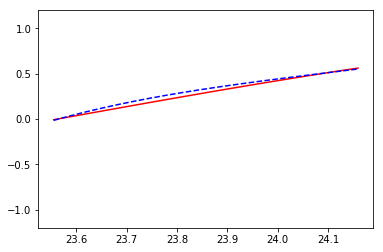

KeyboardInterrupt: 

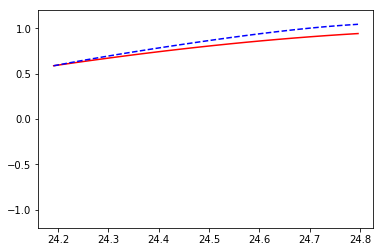

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 10
LR = 0.006

def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50 batches, 20 steps)
    xs = np.arange(BATCH_START, BATCH_START + TIME_STEPS * BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10 * np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # plt.plot(xs[0,:], res[0,:], 'r', xs[0,:], seq[0,:],'b--')
    # plt.show()
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

# tensorflow-style truncated backpropagation: RNN in batch

class LSTMRNN(object):
    def __init__(self, n_steps, input_size, output_size, cell_size, batch_size):
        self.n_steps = n_steps
        self.input_size = input_size
        self.output_size = output_size
        self.cell_size = cell_size
        self.batch_size = batch_size
        with tf.name_scope('inputs'):
            self.xs = tf.placeholder(tf.float32, [None, n_steps, input_size], name='xs')
            self.ys = tf.placeholder(tf.float32, [None, n_steps, output_size], name='ys')
        with tf.variable_scope('in_hidden'):
            self.add_input_layer()
        with tf.variable_scope('LSTM_cell'):
            self.add_cell()
        with tf.variable_scope('out_hidden'):
            self.add_output_layer()
        with tf.name_scope('cost'):
            self.compute_cost()
        with tf.name_scope('train'):
            self.train_op=tf.train.AdamOptimizer(LR).minimize(self.cost)

    def add_input_layer(self,):
        # [None, n_steps, input_size] ==> [-1, self.input_size] ([batch * n_step, input_size])
        l_in_x = tf.reshape(self.xs, [-1, self.input_size], name='2_2D')
        # Ws(input_size, cell_size)
        Ws_in = self._weight_variable([self.input_size, self.cell_size])
        # bs(cell_size, )
        bs_in = self._bias_variable([self.cell_size,])
        # l_in_y = (batch * n_steps, cell_size)
        with tf.name_scope('Wx_plus_b'):
            l_in_y = tf.matmul(l_in_x, Ws_in) + bs_in
        # reshape l_in_y ==> (batch, n_steps, cell_size)
        self.l_in_y = tf.reshape(l_in_y, [-1, self.n_steps, self.cell_size], name='2_3D')

    def add_cell(self):
        lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(self.cell_size, forget_bias=1.0, state_is_tuple=True)
        with tf.name_scope('initial_state'):
            self.cell_init_state = lstm_cell.zero_state(self.batch_size, dtype=tf.float32)
        self.cell_outputs, self.cell_final_state = tf.nn.dynamic_rnn(
            lstm_cell, self.l_in_y, initial_state=self.cell_init_state, time_major=False
        )

    def add_output_layer(self):
        # shape = (batch * n_steps, cell_size)
        l_out_x = tf.reshape(self.cell_outputs, [-1, self.cell_size], name='2_2D')
        Ws_out = self._weight_variable([self.cell_size, self.output_size])
        bs_out = self._bias_variable([self.output_size, ])
        # shape = (batch * n_steps, output_size)
        with tf.name_scope('Wx_plus_b'):
            self.pred = tf.matmul(l_out_x, Ws_out) + bs_out

    def compute_cost(self):
        losses = tf.contrib.legacy_seq2seq.sequence_loss_by_example(
            [tf.reshape(self.pred, [-1], name='reshape_pred')],
            [tf.reshape(self.ys, [-1], name='reshape_target')],
            [tf.ones([self.batch_size * self.n_steps], dtype=tf.float32)],
            average_across_timesteps=True,
            softmax_loss_function=self.ms_error,
            name='losses'
        )
        with tf.name_scope('average_cost'):
            self.cost = tf.div(
                tf.reduce_sum(losses, name='loss_sum'),
                self.batch_size,
                name='average_cost'
            )
            tf.summary.scalar('cost', self.cost)

    @staticmethod
    def ms_error(labels, logits):
        return tf.square(tf.subtract(labels, logits))

    def _weight_variable(self, shape, name='W'):
        initializer = tf.random_normal_initializer(mean=0., stddev=1.,)
        return tf.get_variable(shape=shape, initializer=initializer, name=name)

    def _bias_variable(self, shape, name='bias'):
        initializer = tf.constant_initializer(0.1)
        return tf.get_variable(name=name, shape=shape, initializer=initializer)

if __name__ == '__main__':
    model = LSTMRNN(TIME_STEPS, INPUT_SIZE, OUTPUT_SIZE, CELL_SIZE, BATCH_SIZE)
    sess = tf.Session()
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("logs", sess.graph)

    init = tf.global_variables_initializer()
    sess.run(init)

    plt.ion()
    plt.show()
    for i in range(200):
        seq, res, xs = get_batch()
        if i == 0:
            feed_dict={model.xs: seq, model.ys: res}
        else:
            feed_dict={model.xs: seq, model.ys: res, model.cell_init_state: state}
        _, cost, state, pred = sess.run(
            [model.train_op, model.cost, model.cell_final_state, model.pred],
            feed_dict=feed_dict
        )

        plt.plot(xs[0, :], res[0].flatten(), 'r', xs[0, :], pred.flatten()[:TIME_STEPS], 'b--')
        plt.ylim((-1.2, 1.2))
        plt.draw()
        plt.pause(0.3)

        if i % 20 == 0:
            print('cost: ', round(cost, 4))
            result = sess.run(merged, feed_dict)
            writer.add_summary(result, i)